# Imports

In [0]:
# Upload or Save "factor.csv" in the same directory
import numpy as np
import pandas as pd
import sklearn.tree
from sklearn.model_selection import train_test_split

# Data Import and Visualization

In [133]:
data_set = pd.read_csv("factor.csv")
data_set

FileNotFoundError: ignored

In [0]:
data_set.iloc[5]

Usage Frequency    1
Complexity         2
Business Impact    1
Damage             1
Name: 5, dtype: int64

In [0]:
# Splitting Features and Labels
X_data = data_set.iloc[:,:3].values
Y_data = data_set.iloc[:,3:4].values

# Splitting Test and Train Data

In [0]:
#test_ids = [0,50,100,124]

In [0]:
#X_train = np.delete(X_data,test_ids, axis=0)
#Y_train = np.delete(Y_data,test_ids)

In [0]:
#X_test = X_data[test_ids]
#Y_test = Y_data[test_ids]

In [0]:
# Using Train Test Split, testsize=1/3
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_data, Y_data, test_size=0.33, random_state=0)

# Training Classifier and Predictions

In [0]:
# Training classifier
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# Testing classifier
test = clf.predict(X_test)

In [0]:
test

array([2, 1, 3, 2, 3, 4, 2, 3, 1, 2, 1, 2, 3, 3, 2, 1, 4, 3, 2, 2, 1, 3,
       4, 2, 2, 1, 3, 2, 2, 2, 1, 4, 3, 2, 4, 3, 2, 2, 1, 2, 3, 4])

In [0]:
Y_test

array([[2],
       [1],
       [3],
       [2],
       [3],
       [4],
       [2],
       [3],
       [1],
       [2],
       [1],
       [2],
       [3],
       [3],
       [2],
       [1],
       [4],
       [3],
       [2],
       [2],
       [1],
       [3],
       [4],
       [2],
       [2],
       [1],
       [3],
       [2],
       [2],
       [2],
       [1],
       [4],
       [3],
       [2],
       [4],
       [3],
       [2],
       [2],
       [1],
       [2],
       [4],
       [4]])

In [0]:
# Accuracy
clf.score(X_test,Y_test)

0.9761904761904762

# Visualizating Decision Tree

In [0]:
# imports for visualization of DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

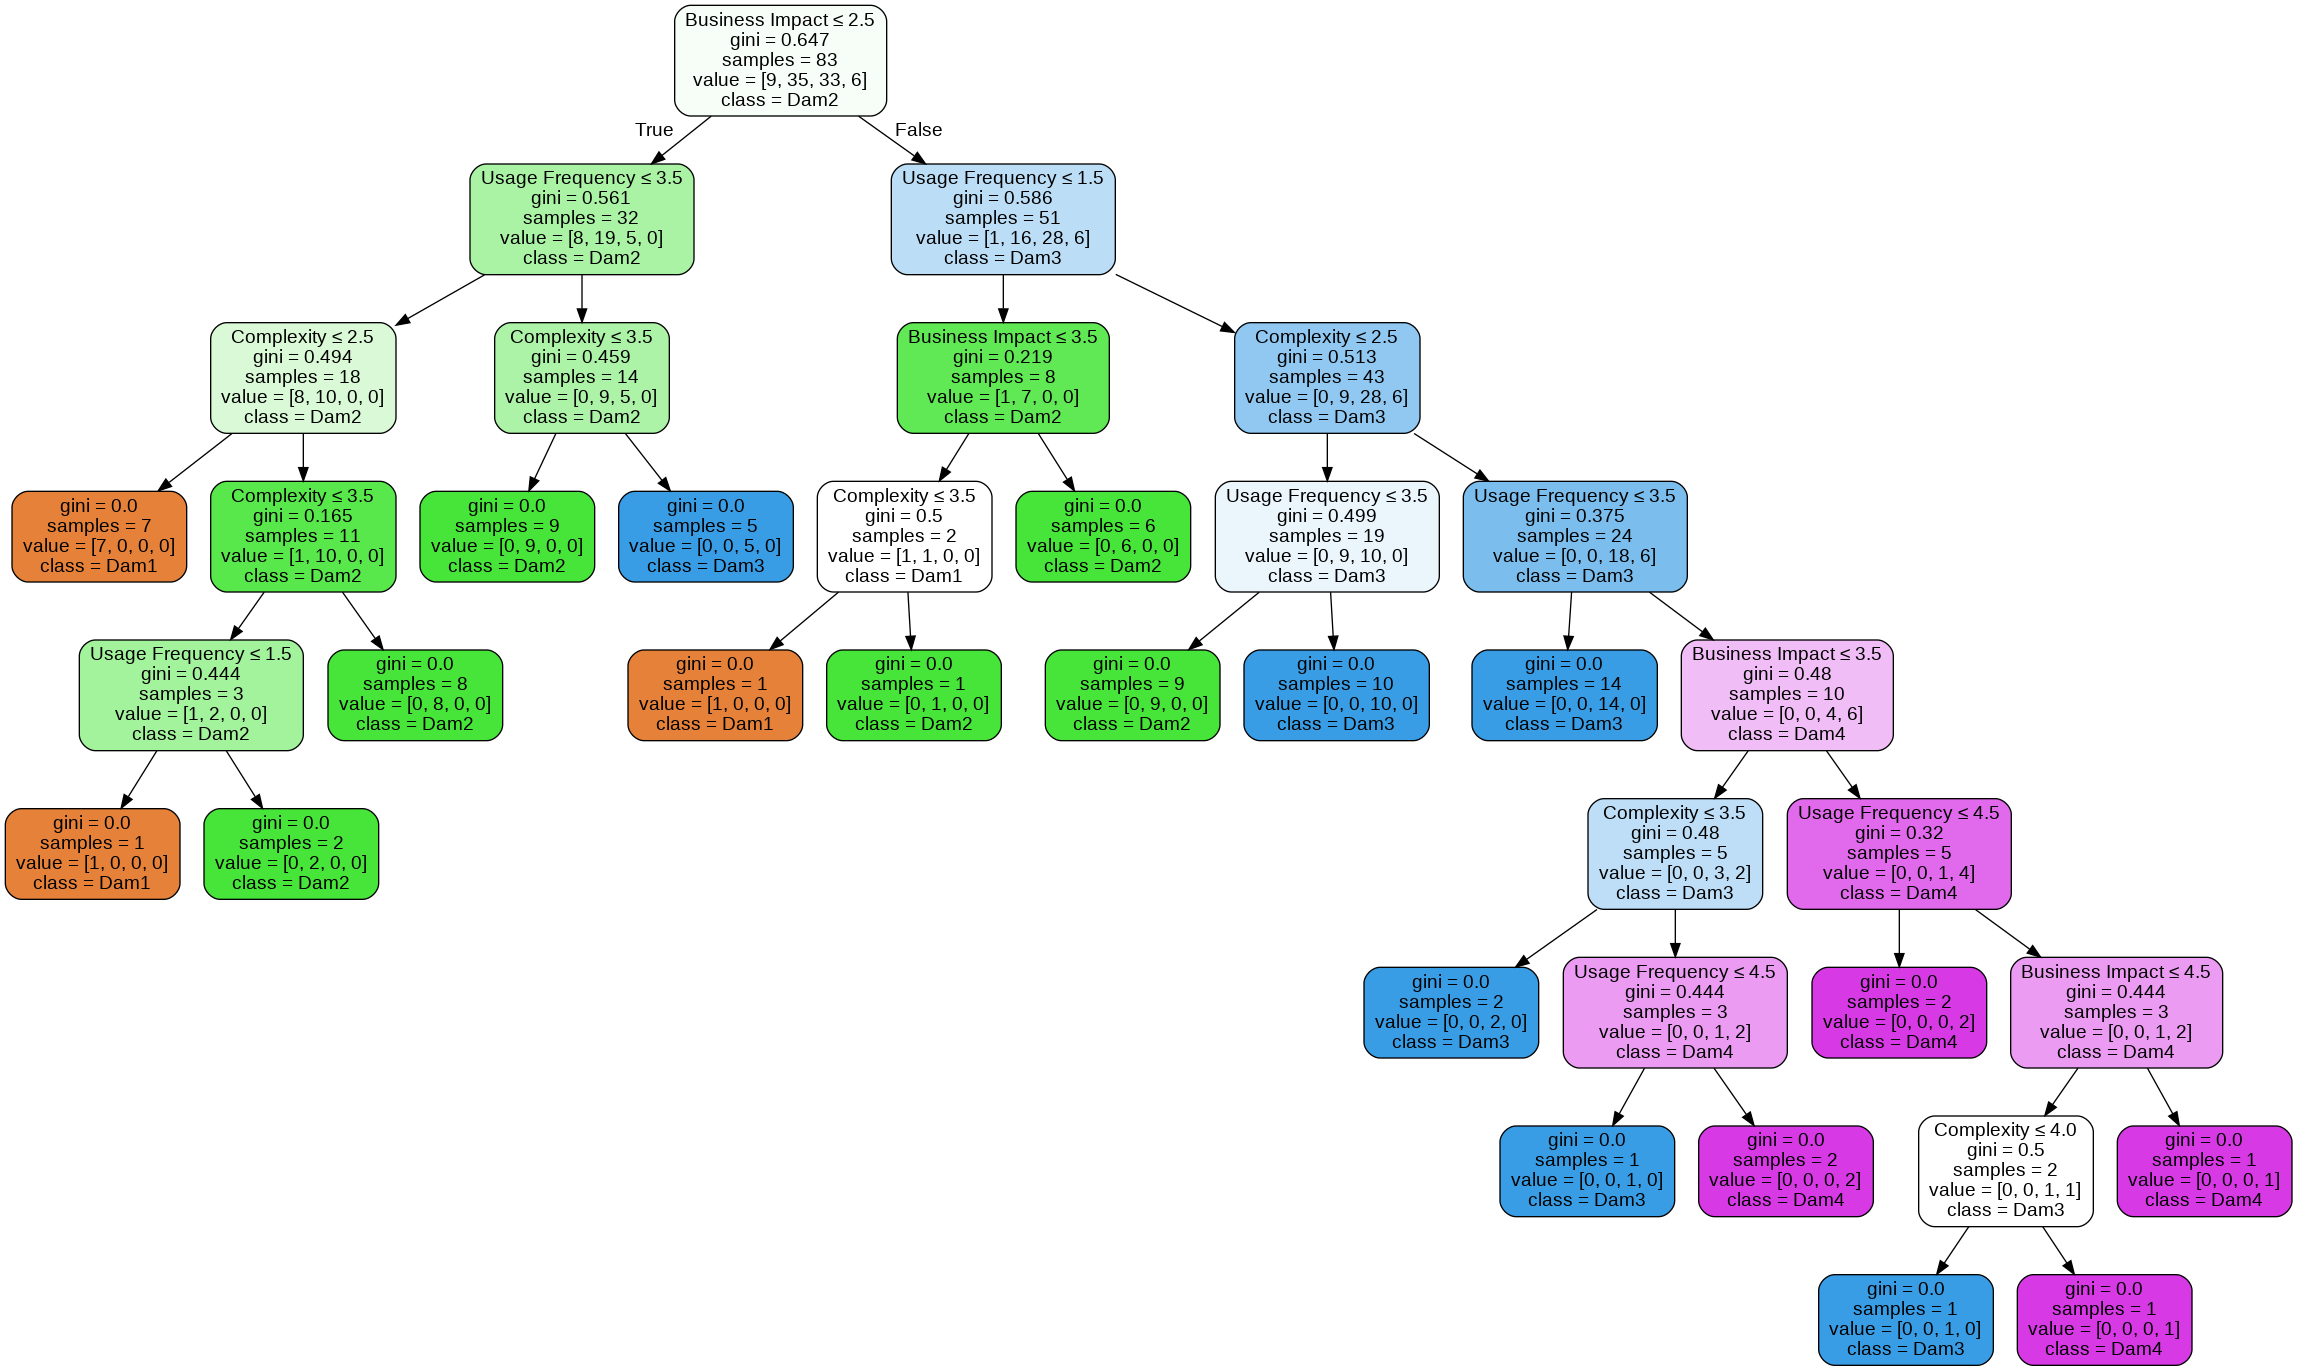

In [0]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                feature_names=["Usage Frequency","Complexity", "Business Impact"],
                class_names=["Dam1","Dam2","Dam3","Dam4", "Dam4"],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Self Evaluation

In [0]:
self_test = 55
print(f"InputData:\n {data_set.iloc[self_test]}\n\n\nPrediction: {clf.predict([X_data[self_test]])}, Expected Output: {Y_data[self_test]}")

InputData:
 Usage Frequency    3
Complexity         2
Business Impact    1
Damage             1
Name: 55, dtype: int64


Prediction: [1], Expected Output: [1]


In [0]:
# THE END

# Using Neural Networks
Please upload factor_v2.csv first!

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Data Visualization

In [135]:
data_v2 = pd.read_csv("factors1.csv")
data_v2

,CP_1.25,MA_1.25,UF_1.25,CO_1,BI_1,HP_-0.75,TC_1,AR_-0.75,CC_1,PD_1,Damage
0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,2,1
2,1,1,1,1,1,1,1,1,1,3,2
3,1,1,1,1,1,1,1,1,1,4,2
4,1,1,1,1,1,1,1,1,1,5,2
5,1,1,1,1,1,1,1,1,2,1,1
6,1,1,1,1,1,1,1,1,2,2,2
7,1,1,1,1,1,1,1,1,2,3,2
8,1,1,1,1,1,1,1,1,2,4,2
9,1,1,1,1,1,1,1,1,2,5,2


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


3    4316
4    3312
2    3200
1    1205
5     467
Name: Damage, dtype: int64

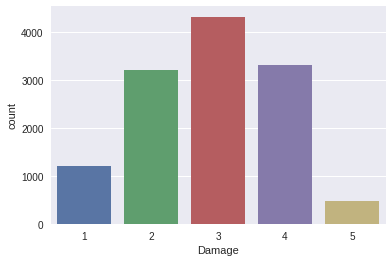

In [136]:
op = data_v2["Damage"]
sns.countplot(op)
op.value_counts()

# Data Preparation

In [0]:
feature = data_v2.drop(labels=["Damage"], axis = 1)
label = data_v2["Damage"]
feature = feature/5.0
del data_v2

# Test Train Split And Encoding

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, label, test_size=0.33, random_state=0)

In [0]:
Y_train = to_categorical(Y_train, num_classes = 6)

# Model Preparation

In [0]:
# MODEL STARTS FROM HERE
clf = Sequential()
clf.add(Dense( units = 20, activation="relu", input_dim = 10))
#clf.add(Dense( units = 12, activation="relu"))
clf.add(Dense(units = 6, activation="sigmoid"))
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [141]:
clf.fit(X_train, Y_train, batch_size =10, epochs =10)

Epoch 1/10
8375/8375 [==============================] - 2s 184us/step - loss: 1.1396 - acc: 0.4952
Epoch 2/10
8375/8375 [==============================] - 1s 112us/step - loss: 0.6053 - acc: 0.8103
Epoch 3/10
8375/8375 [==============================] - 1s 106us/step - loss: 0.4147 - acc: 0.8599
Epoch 4/10
8375/8375 [==============================] - 1s 106us/step - loss: 0.3232 - acc: 0.8880
Epoch 5/10
8375/8375 [==============================] - 1s 107us/step - loss: 0.2718 - acc: 0.9087
Epoch 6/10
8375/8375 [==============================] - 1s 106us/step - loss: 0.2400 - acc: 0.9188
Epoch 7/10
8375/8375 [==============================] - 1s 105us/step - loss: 0.2167 - acc: 0.9335
Epoch 8/10
8375/8375 [==============================] - 1s 106us/step - loss: 0.2001 - acc: 0.9373
Epoch 9/10
8375/8375 [==============================] - 1s 105us/step - loss: 0.1870 - acc: 0.9403
Epoch 10/10
8375/8375 [==============================] - 1s 107us/step - loss: 0.1741 - acc: 0.9490


# Testing

In [0]:
pred = clf.predict(X_test)

In [0]:
results = np.argmax(pred,axis = 1)

In [145]:
## Correct or Incorrect prediction:
## Use # to comment and uncomment line


for i in range(len(Y_test)):
#  if Y_test.iloc[i] != results[i]:
#  if Y_test.iloc[i] == results[i]:
    print(f"Prediction: {results[i]} and Accurate Value: {Y_test.iloc[i]}")
    

Prediction: 4 and Accurate Value: 4
Prediction: 2 and Accurate Value: 2
Prediction: 2 and Accurate Value: 2
Prediction: 1 and Accurate Value: 1
Prediction: 1 and Accurate Value: 1
Prediction: 2 and Accurate Value: 2
Prediction: 4 and Accurate Value: 4
Prediction: 2 and Accurate Value: 2
Prediction: 4 and Accurate Value: 4
Prediction: 3 and Accurate Value: 3
Prediction: 5 and Accurate Value: 5
Prediction: 1 and Accurate Value: 1
Prediction: 2 and Accurate Value: 2
Prediction: 2 and Accurate Value: 2
Prediction: 1 and Accurate Value: 1
Prediction: 4 and Accurate Value: 4
Prediction: 3 and Accurate Value: 3
Prediction: 5 and Accurate Value: 5
Prediction: 2 and Accurate Value: 2
Prediction: 2 and Accurate Value: 2
Prediction: 2 and Accurate Value: 2
Prediction: 4 and Accurate Value: 4
Prediction: 3 and Accurate Value: 3
Prediction: 5 and Accurate Value: 5
Prediction: 4 and Accurate Value: 4
Prediction: 4 and Accurate Value: 4
Prediction: 3 and Accurate Value: 3
Prediction: 2 and Accurate V

In [146]:
print(results[5])
print(Y_test.iloc[5])

2
2


In [147]:
result = clf.predict(np.array([[1,1,1,1,1,5,1,5,1,1]])/5)
np.argmax(result)

1